<a href="https://colab.research.google.com/github/Namsik-Yoon/pytorch_basic/blob/master/5_2%20Non%20Linear%20%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

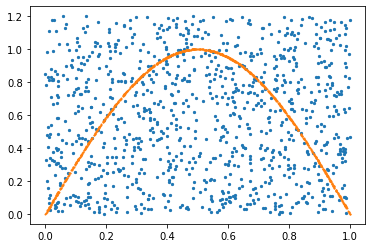

In [2]:
X = np.random.random((1000,2))
X[:,1] = X[:,1]*1.2

plt.scatter(X[:,0],X[:,1],s=5)
plt.scatter(X[:,0],np.sin(X[:,0]*np.pi),s=1)
plt.show()

In [0]:
y = []
for i in X:
    if i[1]<np.sin(i[0]*np.pi):y.append([1.])
    else:y.append([0.])
y = np.array(y)


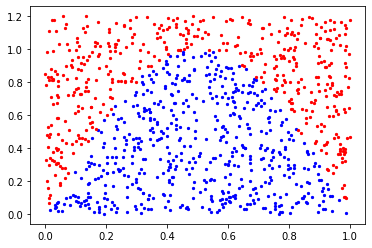

In [4]:
for i,x in enumerate(X):
    if y[i]==0:
        plt.scatter(*x,c='red',s=5)
    else:
        plt.scatter(*x,c='blue',s=5)
    

단층 퍼셉트론

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.layer = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer(x)
        out = self.sigmoid(out)
        return out

In [0]:
model1 = Model1()
criterion= nn.BCELoss()
optimizer = optim.Adam(model1.parameters(),lr=0.01)

In [8]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model1(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.816757
Epoch 1000 Cost: 0.476821
Epoch 2000 Cost: 0.473589
Epoch 3000 Cost: 0.473585
Epoch 4000 Cost: 0.473585
Epoch 5000 Cost: 0.473585
Epoch 6000 Cost: 0.473585
Epoch 7000 Cost: 0.473585
Epoch 8000 Cost: 0.473585
Epoch 9000 Cost: 0.473585


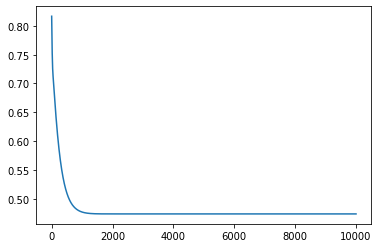

In [9]:
plt.plot(losses)
plt.show()

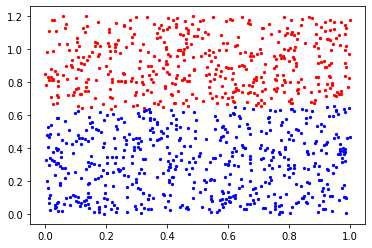

In [10]:
for i,x in enumerate(X):
    pred_y = model1(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)
    

다층 퍼셉트론

In [0]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4,1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.sigmoid(out)
        return out

In [0]:
model2 = Model2()
criterion= nn.BCELoss()
optimizer = optim.Adam(model2.parameters(),lr=0.001)

In [13]:
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)
losses = []

for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model2(X) # forwar 연산
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print('Epoch {:4d} Cost: {:.6f}'.format(
            epoch, loss.item()))

    losses.append(loss.item())

Epoch    0 Cost: 0.701568
Epoch 1000 Cost: 0.458527
Epoch 2000 Cost: 0.356344
Epoch 3000 Cost: 0.231766
Epoch 4000 Cost: 0.166704
Epoch 5000 Cost: 0.126890
Epoch 6000 Cost: 0.100883
Epoch 7000 Cost: 0.083258
Epoch 8000 Cost: 0.070718
Epoch 9000 Cost: 0.061553


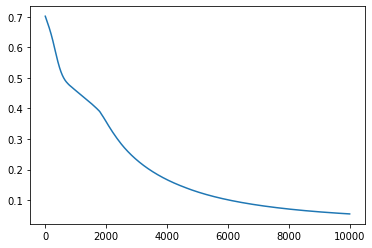

In [14]:
plt.plot(losses)
plt.show()

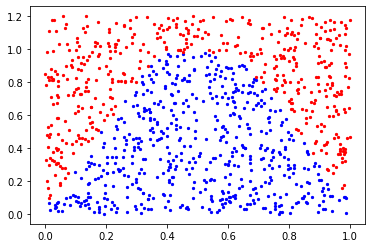

In [15]:
for i,x in enumerate(X):
    pred_y = model2(x)
    if pred_y<=0.5:
        plt.scatter(*x.detach(),c='red',s=5)
    else:
        plt.scatter(*x.detach(),c='blue',s=5)
    